In [3]:
import requests
from bs4 import BeautifulSoup

import pandas as pd

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

import time


In [3]:
url = "https://remax.pt/pt/comprar/imoveis/habitacao/evora/r/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p=1&o=-PublishDate"

r = requests.get(url)
r.status_code

200

In [4]:
soup = BeautifulSoup(r.content)

soup.find_all("div", attrs = {"class": "grid"}) # we will find nothing. Selenium comes to the rescue


[]

### Selenium

In [5]:
url = "https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p=1&o=-PublishDate"

#creating a driver that will mimic an user navigating the web
driver = webdriver.Chrome()

driver.get(url)
# because we are using selenium, the elements have time to load and we are able to scrape the data
# should use time.sleep(5) to wait for the page to load and mimic a human behavior

In [6]:
#we must scroll all the way down to load all the elements
#driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

body = driver.find_element(By.TAG_NAME, "body")
for i in range(4):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)


'<html lang="pt" data-headlessui-focus-visible=""><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no"><link rel="icon" href="/favicon.ico"><link rel="icon" href="/favicon.svg" type="image/svg+xml"><link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png"><link rel="icon" type="image/png" sizes="32x32" href="/favicon/favicon-32x32.png"><link rel="icon" type="image/png" sizes="16x16" href="/favicon/favicon-16x16.png"><link rel="manifest" href="/favicon/site.webmanifest"><link rel="mask-icon" href="/favicon/safari-pinned-tab.svg" color="#003aa8"><meta name="msapplication-TileColor" content="#ffffff"><meta name="msapplication-config" content="/favicon/browserconfig.xml"><meta name="theme-color" content="#ffffff"><link rel="preconnect" href="https://fonts.googleapis.com"><link rel="preconnect" href="https://fonts.gstatic.com"><meta name="msvalidate.01" content="02E3074854EE1D4986D797C374329F85"><m
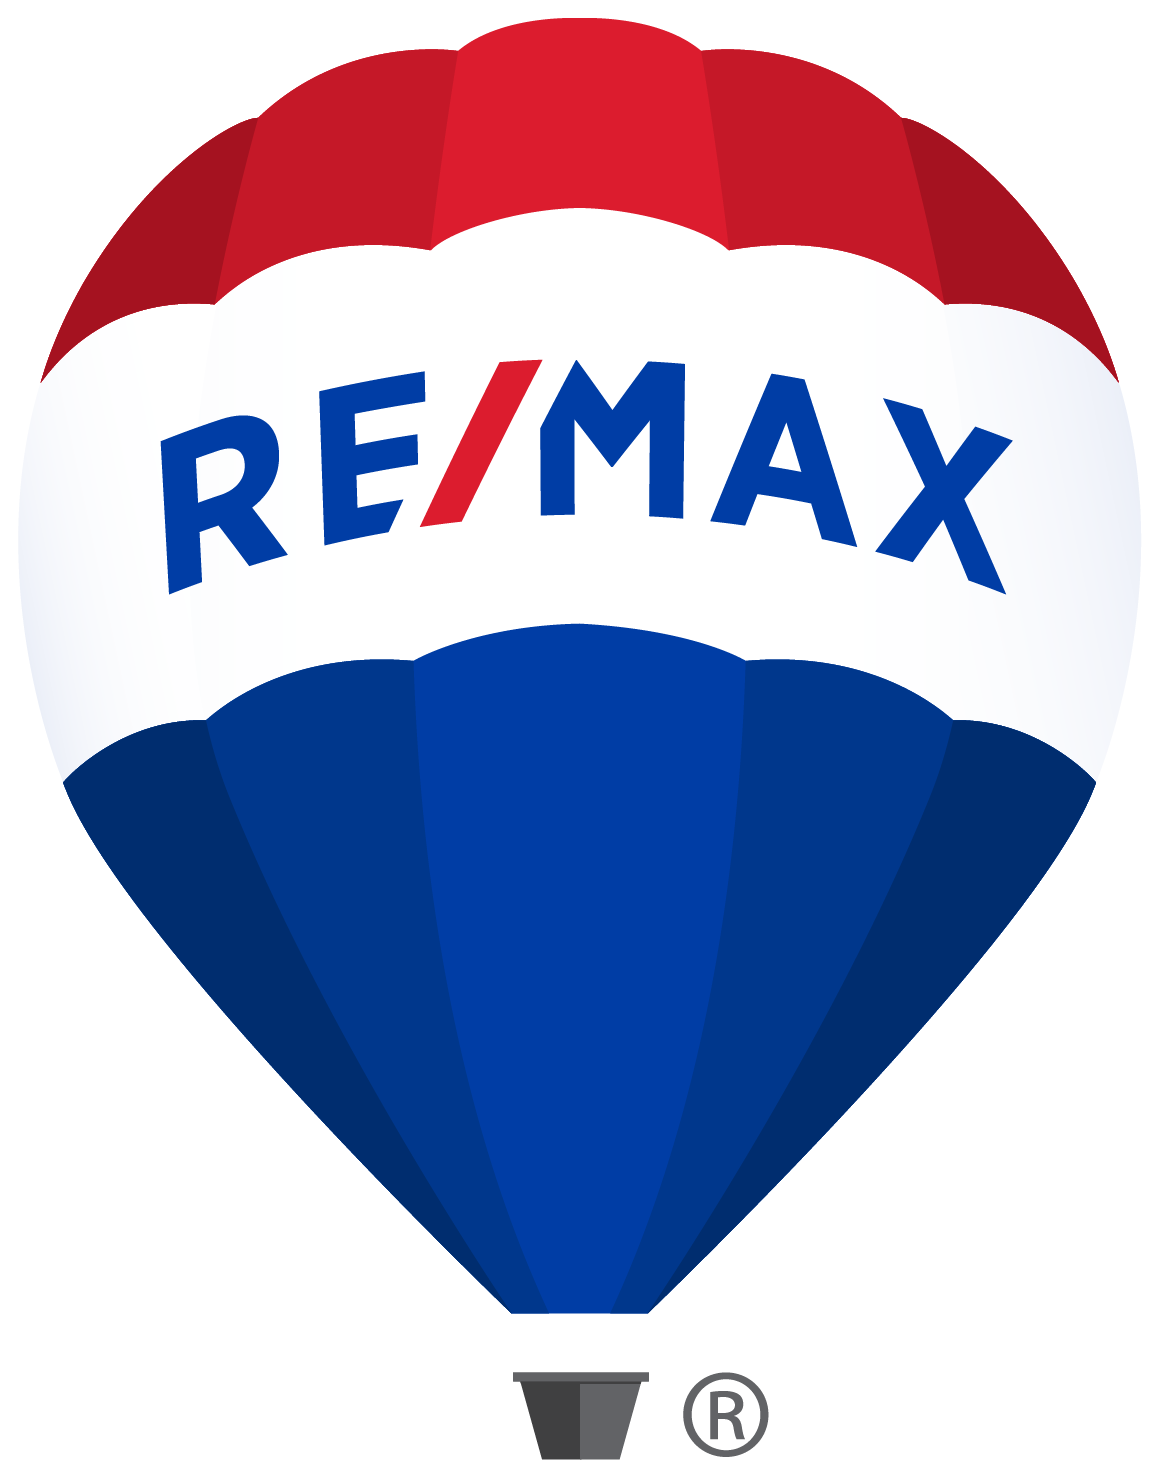

In [7]:
html = driver.page_source
html

<html data-headlessui-focus-visible="" lang="pt"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/><link href="/favicon.ico" rel="icon"/><link href="/favicon.svg" rel="icon" type="image/svg+xml"/><link href="/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link href="/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="/favicon/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/><link href="/favicon/site.webmanifest" rel="manifest"/><link color="#003aa8" href="/favicon/safari-pinned-tab.svg" rel="mask-icon"/><meta content="#ffffff" name="msapplication-TileColor"/><meta content="/favicon/browserconfig.xml" name="msapplication-config"/><meta content="#ffffff" name="theme-color"/><link href="https://fonts.googleapis.com" rel="preconnect"/><link href="https://fonts.gstatic.com" rel="preconnect"/><meta content="02E3074854EE1D4986D797C374329F85" name="msva
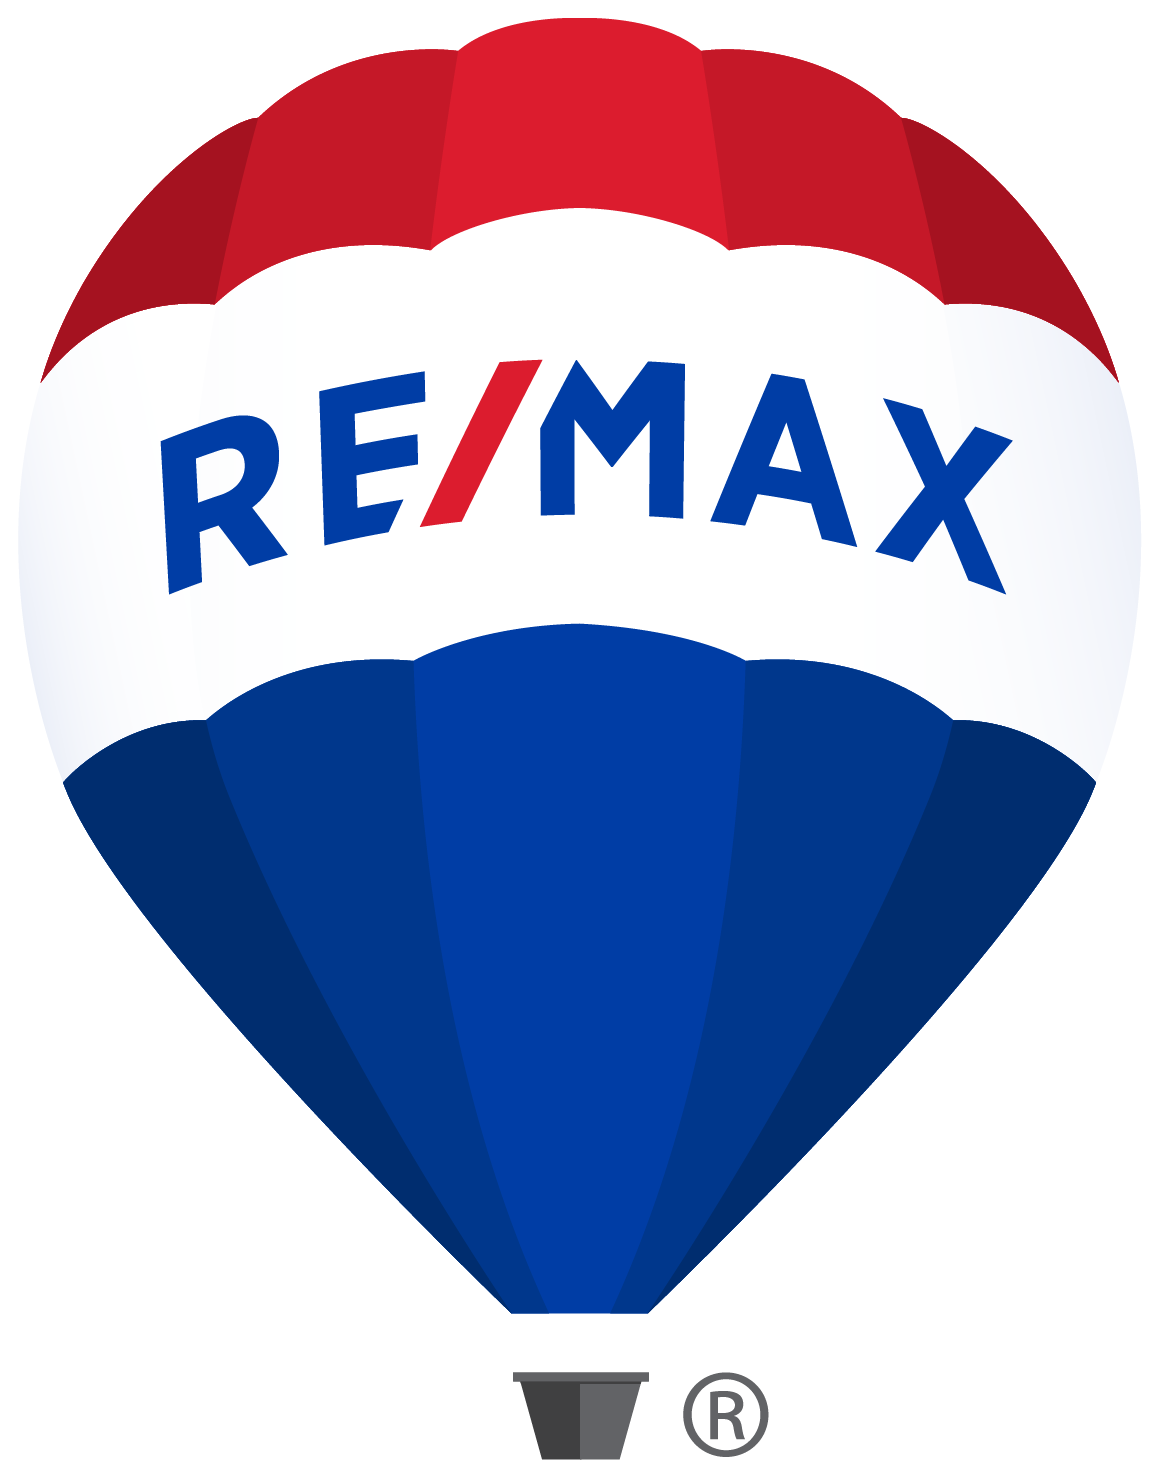

In [8]:
#prepare the soup from the new html
soup = BeautifulSoup(html)
soup

In [9]:
houses = soup.find_all("div", attrs = {"data-id":"listing-card-container"}) 

In [10]:
house_price = houses[0].find_all("b", attrs = {"class":"relative leading-[140%]"})[0].get_text()
house_price

'347 500 €'

In [11]:
house_location = houses[0].find_all("p", attrs = {"class":"w-full overflow-hidden text-ellipsis whitespace-nowrap"})[0].get_text()
house_location


'Malagueira e Horta das Figueiras, Évora'

In [12]:
listing_type = houses[0].find_all("b", attrs = {"class":"relative leading-[160%] truncate"})[0].get_text()
listing_type

'Moradia'

In [13]:
houses[0].find_all("a", attrs = ({"data-id":"listing-card-link"}))[0]["href"]


'/pt/imoveis/venda-moradia-t4-evora-malagueira-e-horta-das-figueiras/120121055-2258'

In [14]:
houses_dict = {}
index = 0

for house in houses:
    price = house.find_all("b", attrs = {"class":"relative leading-[140%]"})[0].get_text()
    location = house.find_all("p", attrs = {"class":"w-full overflow-hidden text-ellipsis whitespace-nowrap"})[0].get_text()
    listing_type = house.find_all("b", attrs = {"class":"relative leading-[160%] truncate"})[0].get_text()
    house_url = house.find_all("a", attrs = ({"data-id":"listing-card-link"}))[0]["href"]
    base_url = "https://remax.pt"

    houses_dict[index] = {"price": price, 
                          "location": location, 
                          "listing_type": listing_type, 
                          "url": base_url + house_url}
    index += 1 

houses_dict

{0: {'price': '347 500 €',
  'location': 'Malagueira e Horta das Figueiras, Évora',
  'listing_type': 'Moradia',
  'url': 'https://remax.pt/pt/imoveis/venda-moradia-t4-evora-malagueira-e-horta-das-figueiras/120121055-2258'},
 1: {'price': '1 700 000 €',
  'location': 'Bacelo e Senhora da Saúde, Évora',
  'listing_type': 'Terreno',
  'url': 'https://remax.pt/pt/imoveis/venda-terreno-tevora-bacelo-e-senhora-da-saude/120121286-8'},
 2: {'price': '22 500 €',
  'location': 'Malagueira e Horta das Figueiras, Évora',
  'listing_type': 'Garagem',
  'url': 'https://remax.pt/pt/imoveis/venda-garagem-tevora-malagueira-e-horta-das-figueiras/124771033-75'},
 3: {'price': '700 000 €',
  'location': 'Évora (São Mamede, Sé, São Pedro e Santo Antão), Évora',
  'listing_type': 'Moradia',
  'url': 'https://remax.pt/pt/imoveis/venda-moradia-t8-evora-evora-sao-mamede-se-sao-pedro-e-santo-antao/120121068-306'},
 4: {'price': '180 000 €',
  'location': 'Évora (São Mamede, Sé, São Pedro e Santo Antão), Évora'

In [15]:
dir(driver)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_authenticator_id',
 '_check_if_window_handle_is_current',
 '_fedcm',
 '_file_detector',
 '_get_cdp_details',
 '_is_remote',
 '_mobile',
 '_require_fedcm_support',
 '_script',
 '_shadowroot_cls',
 '_start_bidi',
 '_switch_to',
 '_unwrap_value',
 '_web_element_cls',
 '_websocket_connection',
 '_wrap_value',
 'add_cookie',
 'add_credential',
 'add_virtual_authenticator',
 'back',
 'bidi_connection',
 'capabilities',
 'caps',
 'close',
 'command_executor',
 'create_web_element',
 'current_url',
 'c

In [16]:
#wrapping everything in a function
def scrape_remax(url):
    driver = webdriver.Chrome()
    driver.get(url)
    driver.maximize_window()
    time.sleep(1)

    body = driver.find_element(By.TAG_NAME, "body")
    for i in range(4):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.2)

    html = driver.page_source
    soup = BeautifulSoup(html)

    index = 0
    for house in houses:
        price = house.find_all("b", attrs = {"class":"relative leading-[140%]"})[0].get_text()
        location = house.find_all("p", attrs = {"class":"w-full overflow-hidden text-ellipsis whitespace-nowrap"})[0].get_text()
        listing_type = house.find_all("b", attrs = {"class":"relative leading-[160%] truncate"})[0].get_text()
        house_url = house.find_all("a", attrs = ({"data-id":"listing-card-link"}))[0]["href"]
        base_url = "https://remax.pt"

        houses_dict[index] = {"price": price, 
                            "location": location, 
                            "listing_type": listing_type, 
                            "url": base_url + house_url}
        index += 1 
    
    driver.close()
    return houses_dict

In [17]:
page_number = 1 

first_page = f'https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p={page_number}&o=-PublishDate' 

In [18]:
all_pages = [ f'https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p={page_number}&o=-PublishDate' for page_number in range(1, 9)]
all_pages

['https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p=1&o=-PublishDate',
 'https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p=2&o=-PublishDate',
 'https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p=3&o=-PublishDate',
 'https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p=4&o=-PublishDate',
 'https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p=5&o=-PublishDate',
 'https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p=6&o=-PublishDate',
 'https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p=7&o=-PublishDate',
 'https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p=8&o=-PublishDate']

In [19]:
url = 'https://remax.pt/pt/comprar/imoveis/habitacao/evora/evora/r/t?s=%7B%22rg%22%3A%22%C3%89vora%22%7D&p=1&o=-PublishDate'
scrape_remax(url)



{0: {'price': '347 500 €',
  'location': 'Malagueira e Horta das Figueiras, Évora',
  'listing_type': 'Moradia',
  'url': 'https://remax.pt/pt/imoveis/venda-moradia-t4-evora-malagueira-e-horta-das-figueiras/120121055-2258'},
 1: {'price': '1 700 000 €',
  'location': 'Bacelo e Senhora da Saúde, Évora',
  'listing_type': 'Terreno',
  'url': 'https://remax.pt/pt/imoveis/venda-terreno-tevora-bacelo-e-senhora-da-saude/120121286-8'},
 2: {'price': '22 500 €',
  'location': 'Malagueira e Horta das Figueiras, Évora',
  'listing_type': 'Garagem',
  'url': 'https://remax.pt/pt/imoveis/venda-garagem-tevora-malagueira-e-horta-das-figueiras/124771033-75'},
 3: {'price': '700 000 €',
  'location': 'Évora (São Mamede, Sé, São Pedro e Santo Antão), Évora',
  'listing_type': 'Moradia',
  'url': 'https://remax.pt/pt/imoveis/venda-moradia-t8-evora-evora-sao-mamede-se-sao-pedro-e-santo-antao/120121068-306'},
 4: {'price': '180 000 €',
  'location': 'Évora (São Mamede, Sé, São Pedro e Santo Antão), Évora'

In [20]:
data_per_page = {}
index = 0

for page in all_pages:
    data = scrape_remax(page)
    data_per_page[index] = data
    index += 1

In [21]:
data_per_page

{0: {0: {'price': '347 500 €',
   'location': 'Malagueira e Horta das Figueiras, Évora',
   'listing_type': 'Moradia',
   'url': 'https://remax.pt/pt/imoveis/venda-moradia-t4-evora-malagueira-e-horta-das-figueiras/120121055-2258'},
  1: {'price': '1 700 000 €',
   'location': 'Bacelo e Senhora da Saúde, Évora',
   'listing_type': 'Terreno',
   'url': 'https://remax.pt/pt/imoveis/venda-terreno-tevora-bacelo-e-senhora-da-saude/120121286-8'},
  2: {'price': '22 500 €',
   'location': 'Malagueira e Horta das Figueiras, Évora',
   'listing_type': 'Garagem',
   'url': 'https://remax.pt/pt/imoveis/venda-garagem-tevora-malagueira-e-horta-das-figueiras/124771033-75'},
  3: {'price': '700 000 €',
   'location': 'Évora (São Mamede, Sé, São Pedro e Santo Antão), Évora',
   'listing_type': 'Moradia',
   'url': 'https://remax.pt/pt/imoveis/venda-moradia-t8-evora-evora-sao-mamede-se-sao-pedro-e-santo-antao/120121068-306'},
  4: {'price': '180 000 €',
   'location': 'Évora (São Mamede, Sé, São Pedro e

In [90]:
#values = data_per_page.values()
#numpy.dtype(values)

In [92]:
listings = pd.DataFrame.from_dict(data_per_page, orient = "index")
df_list = pd.DataFrame(columns = ['id','freguesia','preço','tipo','url'], index = range(200))

In [108]:
df_list['preço'].head(30)

0       347 500 €
1     1 700 000 €
2        22 500 €
3       700 000 €
4       180 000 €
5       185 000 €
6       218 000 €
7        66 000 €
8       270 000 €
9       180 000 €
10      275 000 €
11      339 000 €
12      292 000 €
13    1 500 000 €
14      159 000 €
15      256 320 €
16      217 000 €
17      427 500 €
18      269 000 €
19      360 000 €
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
Name: preço, dtype: object

In [89]:
listings.loc[0][0].get('location')

'Malagueira e Horta das Figueiras, Évora'

In [104]:
listings

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"{'price': '347 500 €', 'location': 'Malagueira...","{'price': '1 700 000 €', 'location': 'Bacelo e...","{'price': '22 500 €', 'location': 'Malagueira ...","{'price': '700 000 €', 'location': 'Évora (São...","{'price': '180 000 €', 'location': 'Évora (São...","{'price': '185 000 €', 'location': 'Évora (São...","{'price': '218 000 €', 'location': 'Évora (São...","{'price': '66 000 €', 'location': 'São Manços ...","{'price': '270 000 €', 'location': 'Malagueira...","{'price': '180 000 €', 'location': 'Évora (São...","{'price': '275 000 €', 'location': 'Nossa Senh...","{'price': '339 000 €', 'location': 'Malagueira...","{'price': '292 000 €', 'location': 'Bacelo e S...","{'price': '1 500 000 €', 'location': 'Nossa Se...","{'price': '159 000 €', 'location': 'Malagueira...","{'price': '256 320 €', 'location': 'Bacelo e S...","{'price': '217 000 €', 'location': 'Malagueira...","{'price': '427 500 €', 'location': 'Évora (São...","{'price': '269 000 €', 'location': 'Bacelo e S...","{'price': '360 000 €', 'location': 'Malagueira..."
1,"{'price': '347 500 €', 'location': 'Malagueira...","{'price': '1 700 000 €', 'location': 'Bacelo e...","{'price': '22 500 €', 'location': 'Malagueira ...","{'price': '700 000 €', 'location': 'Évora (São...","{'price': '180 000 €', 'location': 'Évora (São...","{'price': '185 000 €', 'location': 'Évora (São...","{'price': '218 000 €', 'location': 'Évora (São...","{'price': '66 000 €', 'location': 'São Manços ...","{'price': '270 000 €', 'location': 'Malagueira...","{'price': '180 000 €', 'location': 'Évora (São...","{'price': '275 000 €', 'location': 'Nossa Senh...","{'price': '339 000 €', 'location': 'Malagueira...","{'price': '292 000 €', 'location': 'Bacelo e S...","{'price': '1 500 000 €', 'location': 'Nossa Se...","{'price': '159 000 €', 'location': 'Malagueira...","{'price': '256 320 €', 'location': 'Bacelo e S...","{'price': '217 000 €', 'location': 'Malagueira...","{'price': '427 500 €', 'location': 'Évora (São...","{'price': '269 000 €', 'location': 'Bacelo e S...","{'price': '360 000 €', 'location': 'Malagueira..."
2,"{'price': '347 500 €', 'location': 'Malagueira...","{'price': '1 700 000 €', 'location': 'Bacelo e...","{'price': '22 500 €', 'location': 'Malagueira ...","{'price': '700 000 €', 'location': 'Évora (São...","{'price': '180 000 €', 'location': 'Évora (São...","{'price': '185 000 €', 'location': 'Évora (São...","{'price': '218 000 €', 'location': 'Évora (São...","{'price': '66 000 €', 'location': 'São Manços ...","{'price': '270 000 €', 'location': 'Malagueira...","{'price': '180 000 €', 'location': 'Évora (São...","{'price': '275 000 €', 'location': 'Nossa Senh...","{'price': '339 000 €', 'location': 'Malagueira...","{'price': '292 000 €', 'location': 'Bacelo e S...","{'price': '1 500 000 €', 'location': 'Nossa Se...","{'price': '159 000 €', 'location': 'Malagueira...","{'price': '256 320 €', 'location': 'Bacelo e S...","{'price': '217 000 €', 'location': 'Malagueira...","{'price': '427 500 €', 'location': 'Évora (São...","{'price': '269 000 €', 'location': 'Bacelo e S...","{'price': '360 000 €', 'location': 'Malagueira..."
3,"{'price': '347 500 €', 'location': 'Malagueira...","{'price': '1 700 000 €', 'location': 'Bacelo e...","{'price': '22 500 €', 'location': 'Malagueira ...","{'price': '700 000 €', 'location': 'Évora (São...","{'price': '180 000 €', 'location': 'Évora (São...","{'price': '185 000 €', 'location': 'Évora (São...","{'price': '218 000 €', 'location': 'Évora (São...","{'price': '66 000 €', 'location': 'São Manços ...","{'price': '270 000 €', 'location': 'Malagueira...","{'price': '180 000 €', 'location': 'Évora (São...","{'price': '275 000 €', 'location': 'Nossa Senh...","{'price': '339 000 €', 'location': 'Malagueira...","{'price': '292 000 €', 'location': 'Bacelo e S...","{'price': '1 500 000 €', 'location': 'Nossa Se...","{'price': '159 000 €', 'location': 'Malagueira...","{'price': '256 320 €', 'location': 'Bace

In [ ]:
for listing in range(20):
    for page in range(7):
        df_list['preço'][listing] = listings.loc[page][listing].get('price') 

In [23]:
### with Selenium you can also send data to some elements, click on elements, and so on...
url = "https://github.com/"
driver = webdriver.Chrome()

driver.get(url)
driver.maximize_window()

#look for headless mode to run the script without the browsers popping up in your screen

In [24]:
sign_in_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/header/div/div[1]/div[2]/a")
#watch out for page resolution as it might change the XPATH for the element you are looking for

In [25]:
sign_in_button.click()

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=134.0.6998.89)
Stacktrace:
	GetHandleVerifier [0x00007FF6DB83FE45+26629]
	(No symbol) [0x00007FF6DB7A6010]
	(No symbol) [0x00007FF6DB63914C]
	(No symbol) [0x00007FF6DB690D24]
	(No symbol) [0x00007FF6DB6828A4]
	(No symbol) [0x00007FF6DB6B7AAA]
	(No symbol) [0x00007FF6DB682156]
	(No symbol) [0x00007FF6DB6B7CC0]
	(No symbol) [0x00007FF6DB6E0169]
	(No symbol) [0x00007FF6DB6B7883]
	(No symbol) [0x00007FF6DB680550]
	(No symbol) [0x00007FF6DB681803]
	GetHandleVerifier [0x00007FF6DBB972BD+3529853]
	GetHandleVerifier [0x00007FF6DBBADA22+3621858]
	GetHandleVerifier [0x00007FF6DBBA24D3+3575443]
	GetHandleVerifier [0x00007FF6DB90B77A+860474]
	(No symbol) [0x00007FF6DB7B088F]
	(No symbol) [0x00007FF6DB7ACBC4]
	(No symbol) [0x00007FF6DB7ACD66]
	(No symbol) [0x00007FF6DB79C2C9]
	BaseThreadInitThunk [0x00007FFA2E097374+20]
	RtlUserThreadStart [0x00007FFA2EC9CC91+33]


In [ ]:
username = driver.find_element(By.ID, "login_field")
username.send_keys("YOUR_EMAIL")

In [ ]:
pwd = driver.find_element(By.ID, "password")
pwd.send_keys("PASSWORD")

pwd.send_keys(Keys.ENTER)